<a href="https://colab.research.google.com/github/LilChucky/rnn-uni-project/blob/main/ComparingBasicRNNArchitectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# input_file_id = "1ers2su-PL7b9X0tR0wrDTox2n5Vx8jOl"
# input_file_path = f'https://drive.google.com/uc?id={input_file_id}'

# inputData = np.loadtxt(input_file_path, delimiter=",")
# inputData

# input_df = pd.DataFrame(inputData)
# input_df

file_path_input = '/content/gdrive/MyDrive/Input_Data.txt'
df_input = pd.read_csv(file_path_input, delimiter=',', header=None)
# array_input = df_input.values
# array_input

In [ ]:
# output_file_id = "14p5UV7hXQwYqlsShJzvvFQioJrZ67dlN"
# output_file_path = f'https://drive.google.com/uc?id={output_file_id}'

# outputData = np.loadtxt(output_file_path, delimiter=",")
# outputData

# output_df = pd.DataFrame(outputData)

# output_df

# import urllib.request
# # Download the file
# urllib.request.urlretrieve(output_file_path, "Output_Data.txt")

# # # Read the file into a DataFrame
# # output_df = pd.read_csv("Output_Data.txt", delimiter=",")
# # output_df

# # Read the file into a DataFrame
# output_df = pd.read_csv("Output_Data.txt", delimiter=",")
# output_df

# url = 'https://drive.google.com/uc?id={}'.format(output_file_id)
# outputData = np.loadtxt(url, delimiter=",")

# output_df = pd.DataFrame(outputData)
# output_df

 # import urllib

# url = 'https://drive.google.com/uc?id=1ers2su-PL7b9X0tR0wrDTox2n5Vx8jOl'

# # Download the file
# file = urllib.request.urlopen(url)
# print(file)



# # Load the text file using loadtxt
# inputData = np.loadtxt(file)

# # Load the text file as a CSV using genfromtxt
# inputData = np.genfromtxt(file, delimiter=',')

# # Check if the file exists
# if os.path.exists(file_path):
#     # Check if you have read access to the file
#     if os.access(file_path, os.R_OK):
#         print("Read access granted.")
#     else:
#         print("No read access.")
# else:
#     print("File does not exist.")

file_path_output = '/content/gdrive/MyDrive/Output_Data.txt'
df_output = pd.read_csv(file_path_output, delimiter=',', header=None)
# array_output = df_output.values
# array_output

In [ ]:
# Remove negative values
df_input = df_input.applymap(lambda x:0 if x<0 else x)
df_output = df_output.applymap(lambda x:0 if x<0 else x)

In [ ]:
file_path_maxCoffe = '/content/gdrive/MyDrive/CoffeeMachinemaxApp.txt'
cmf =  open(file_path_maxCoffe, "r")
max_Coffee = cmf.read()
cmf.close()
max_Coffee= float(max_Coffee)/1000
max_Coffee

1.08509375

In [ ]:
file_path_maxHouse  = '/content/gdrive/MyDrive/CoffeeMachinemaxAgg.txt'
hmf =  open(file_path_maxHouse, "r")
max_House = hmf.read()
hmf.close()
max_House= float(max_House)/1000
max_House

1.6337000000000002

In [ ]:
#data normalization
df_input_normal = df_input.div(max_House)
df_output_normal = df_output.div(max_Coffee)

In [ ]:
#create train and test set
from sklearn.model_selection import train_test_split

training_set_input_df, testing_set_input_df, training_set_output_df, testing_set_output_df  = train_test_split(df_input_normal,df_output_normal, test_size=0.2, random_state=25)


In [ ]:
#turn dataframes to arrays
training_set_input = training_set_input_df.values
testing_set_input = testing_set_input_df.values

training_set_output = training_set_output_df.values
testing_set_output = testing_set_output_df.values

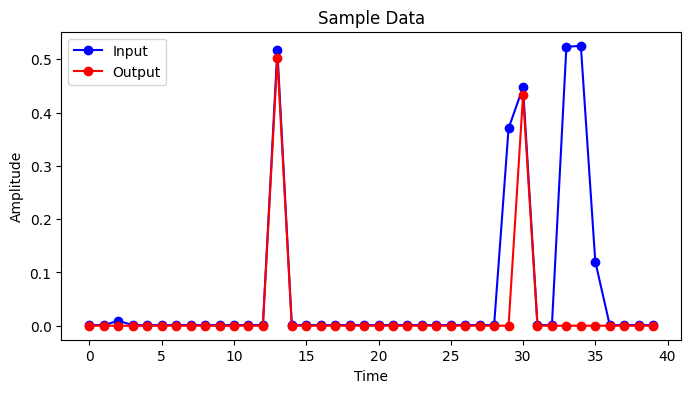

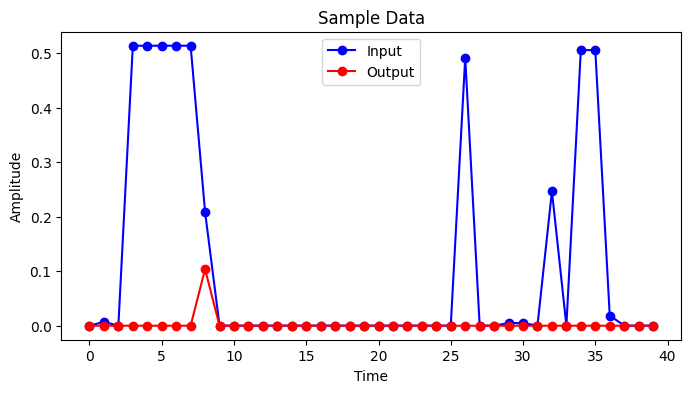

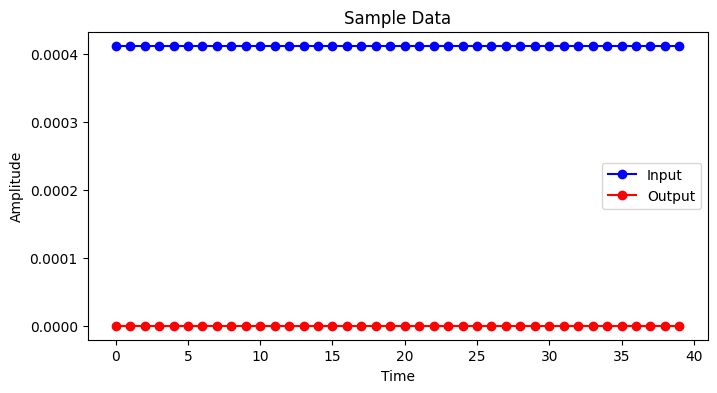

In [ ]:
# Plot sample data
plt.figure(figsize=(8, 4))
plt.plot( training_set_input[2], 'b-o', label='Input')
plt.plot( training_set_output[2], 'r-o', label='Output')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sample Data')
plt.legend()
plt.show()

print(        )

# Plot sample data
plt.figure(figsize=(8, 4))
plt.plot( training_set_input[2023], 'b-o', label='Input')
plt.plot( training_set_output[2023], 'r-o', label='Output')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sample Data')
plt.legend()
plt.show()

print(        )

# Plot sample data
plt.figure(figsize=(8, 4))
plt.plot( training_set_input[23], 'b-o', label='Input')
plt.plot( training_set_output[23], 'r-o', label='Output')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sample Data')
plt.legend()
plt.show()

In [ ]:
# Define model architecture and compile

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
# def lstm():

#   model_lstm = Sequential()
#   model_lstm.add(LSTM(64, input_shape=(seq_length, input_dim),\
#                       return_sequences=True))
#   model_lstm.add(Dense(output_dim))
#   model_lstm.compile(optimizer=Adam(), loss=MeanSquaredError())
#   return model_lstm



output_dim=1
input_dim = 1
seq_length =40 #len(training_set_input)
def lstm():
  model_lstm = Sequential()
  model_lstm.add(LSTM(64, input_shape=(seq_length, input_dim),\
                      return_sequences=True))
  model_lstm.add(Dense(output_dim, activation='softmax'))
  model_lstm.compile( loss='mean_squared_error',optimizer='adam'  ,\
                      metrics=[tf.keras.metrics.Accuracy(name="accuracy"),\
                               tf.keras.metrics.RootMeanSquaredError(name="rootMeanSquareError"),\
                               MeanAbsoluteError()]
                      )
  return model_lstm



def rnn():
  model_rnn = Sequential()
  model_rnn.add(SimpleRNN(64, input_shape=(seq_length, input_dim),\
                          return_sequences=True))
  model_rnn.add(Dense(output_dim))
  model_rnn.compile(optimizer=Adam(), loss=MeanSquaredError(),\
                      metrics=[tf.keras.metrics.Accuracy(name="accuracy"),\
                               tf.keras.metrics.RootMeanSquaredError(name="rootMeanSquareError"),\
                               MeanAbsoluteError()]
                    )
  return model_rnn


def gru():
  model_gru = Sequential()
  model_gru.add(GRU(64, input_shape=(seq_length, input_dim),\
                    return_sequences=True))
  model_gru.add(Dense(output_dim))
  model_gru.compile(optimizer = Adam(), loss=MeanSquaredError(),\
                      metrics=[tf.keras.metrics.Accuracy(name="accuracy"),\
                      tf.keras.metrics.RootMeanSquaredError(name="rootMeanSquareError"),\
                      MeanAbsoluteError()]
                    )
  return model_gru


In [ ]:
epochs = 30 # must be at least 30

In [ ]:
np.shape(training_set_input)

(40000, 40)

In [ ]:
np.shape(training_set_output)

(40000, 40)

In [ ]:
training_set_input=training_set_input.reshape(training_set_input.shape[0],training_set_input.shape[1],1)
training_set_output=training_set_output.reshape(training_set_output.shape[0],training_set_output.shape[1],1)

np.shape(training_set_output)

(40000, 40, 1)

Epoch 1/30
500/500 [==============================] - 12s 9ms/step - loss: 0.9387 - accuracy: 0.0000e+00 - rootMeanSquareError: 0.9689 - mean_absolute_error: 0.9607 - val_loss: 0.9370 - val_accuracy: 0.0000e+00 - val_rootMeanSquareError: 0.9680 - val_mean_absolute_error: 0.9600
Epoch 2/30
500/500 [==============================] - 3s 6ms/step - loss: 0.9387 - accuracy: 0.0000e+00 - rootMeanSquareError: 0.9689 - mean_absolute_error: 0.9607 - val_loss: 0.9370 - val_accuracy: 0.0000e+00 - val_rootMeanSquareError: 0.9680 - val_mean_absolute_error: 0.9600
Epoch 3/30
500/500 [==============================] - 3s 5ms/step - loss: 0.9387 - accuracy: 0.0000e+00 - rootMeanSquareError: 0.9689 - mean_absolute_error: 0.9607 - val_loss: 0.9370 - val_accuracy: 0.0000e+00 - val_rootMeanSquareError: 0.9680 - val_mean_absolute_error: 0.9600
Epoch 4/30
500/500 [==============================] - 3s 5ms/step - loss: 0.9387 - accuracy: 0.0000e+00 - rootMeanSquareError: 0.9689 - mean_absolute_error: 0.9607 -

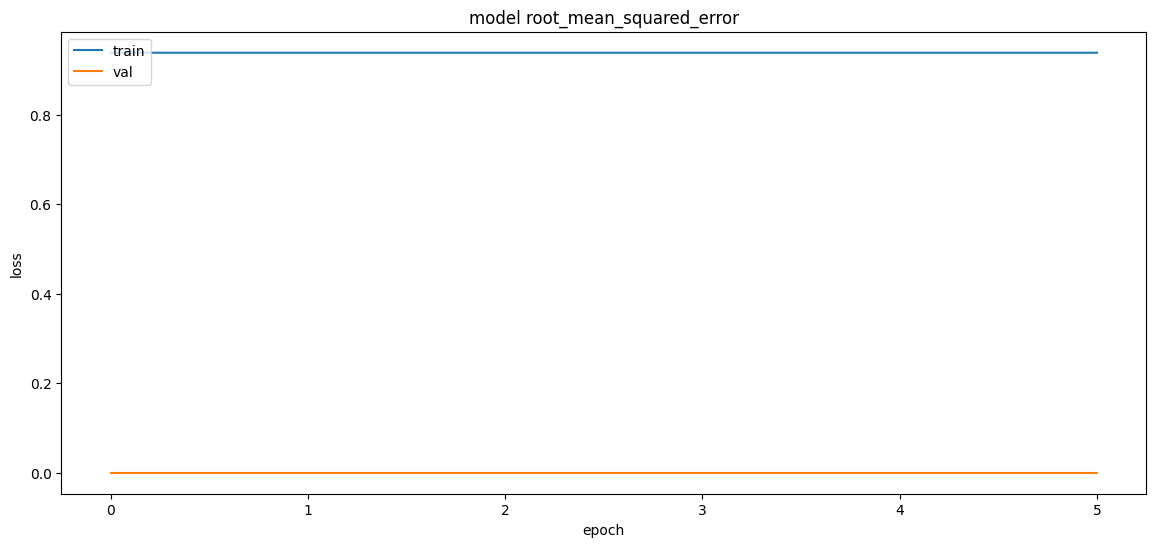

In [ ]:
# model trainning


lstm_model = lstm()
history_lstm = lstm_model.fit(training_set_input, training_set_output, callbacks = my_callbacks, batch_size=64,\
                              epochs=epochs, validation_split=0.2)

#check the performance [TRAIN/ VALIDATION SETS ONLY!]
#1st plot the history performance scores
plt.figure(figsize=(14,6))
plt.plot(history_lstm.history[list(history_lstm.history.keys())[0]])
plt.plot(history_lstm.history[list(history_lstm.history.keys())[1]])
plt.title('model root_mean_squared_error')
plt.ylabel(list(history_lstm.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/30
1000/1000 [==============================] - 26s 25ms/step - loss: 0.0106 - accuracy: 6.2500e-05 - rootMeanSquareError: 0.1031 - mean_absolute_error: 0.0402 - val_loss: 0.0096 - val_accuracy: 0.0000e+00 - val_rootMeanSquareError: 0.0981 - val_mean_absolute_error: 0.0390
Epoch 2/30
1000/1000 [==============================] - 22s 22ms/step - loss: 0.0104 - accuracy: 0.0000e+00 - rootMeanSquareError: 0.1021 - mean_absolute_error: 0.0383 - val_loss: 0.0095 - val_accuracy: 0.0000e+00 - val_rootMeanSquareError: 0.0976 - val_mean_absolute_error: 0.0356
Epoch 3/30
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0104 - accuracy: 0.0000e+00 - rootMeanSquareError: 0.1021 - mean_absolute_error: 0.0380 - val_loss: 0.0096 - val_accuracy: 0.0000e+00 - val_rootMeanSquareError: 0.0982 - val_mean_absolute_error: 0.0362
Epoch 4/30
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0104 - accuracy: 7.8125e-07 - rootMeanSquareError: 0.1020 - mean_absolute_

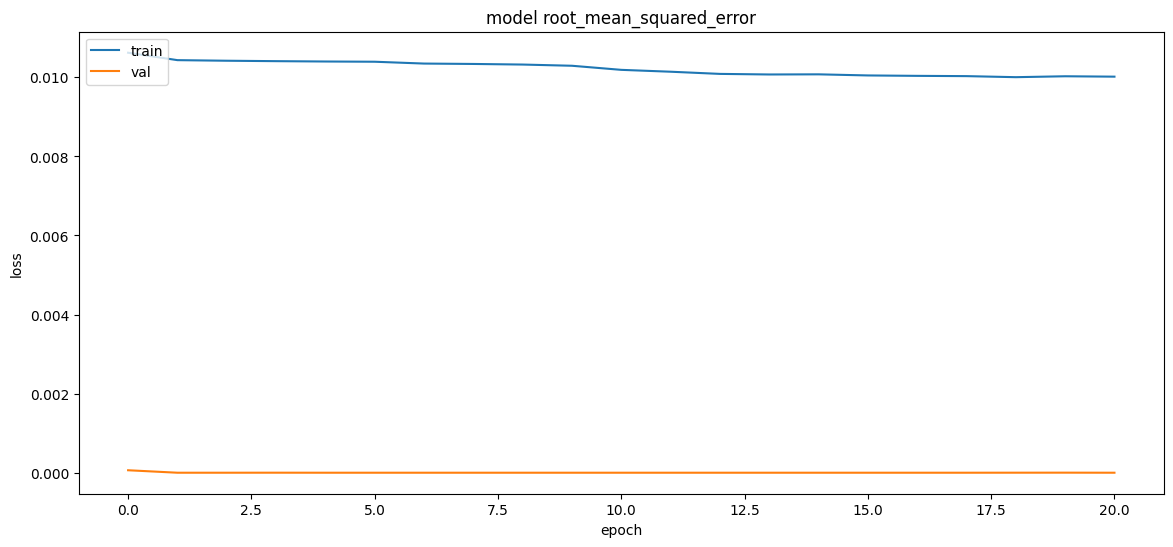

In [ ]:
# model training
rnn_model = rnn()
history_rnn = rnn_model.fit(training_set_input, training_set_output,callbacks = my_callbacks,\
                            epochs=epochs, validation_split=0.2)

#check the performance [TRAIN/ VALIDATION SETS ONLY!]
#1st plot the history performance scores
plt.figure(figsize=(14,6))
plt.plot(history_rnn.history[list(history_rnn.history.keys())[0]])
plt.plot(history_rnn.history[list(history_rnn.history.keys())[1]])
plt.title('model root_mean_squared_error')
plt.ylabel(list(history_rnn.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/30
1000/1000 [==============================] - 9s 7ms/step - loss: 0.0105 - accuracy: 2.1875e-04 - rootMeanSquareError: 0.1026 - mean_absolute_error: 0.0403 - val_loss: 0.0095 - val_accuracy: 0.0000e+00 - val_rootMeanSquareError: 0.0976 - val_mean_absolute_error: 0.0377
Epoch 2/30
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0104 - accuracy: 0.0000e+00 - rootMeanSquareError: 0.1019 - mean_absolute_error: 0.0388 - val_loss: 0.0095 - val_accuracy: 0.0000e+00 - val_rootMeanSquareError: 0.0974 - val_mean_absolute_error: 0.0336
Epoch 3/30
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0104 - accuracy: 0.0000e+00 - rootMeanSquareError: 0.1017 - mean_absolute_error: 0.0381 - val_loss: 0.0095 - val_accuracy: 0.0000e+00 - val_rootMeanSquareError: 0.0974 - val_mean_absolute_error: 0.0357
Epoch 4/30
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0103 - accuracy: 0.0000e+00 - rootMeanSquareError: 0.1016 - mean_absolute_error: 0

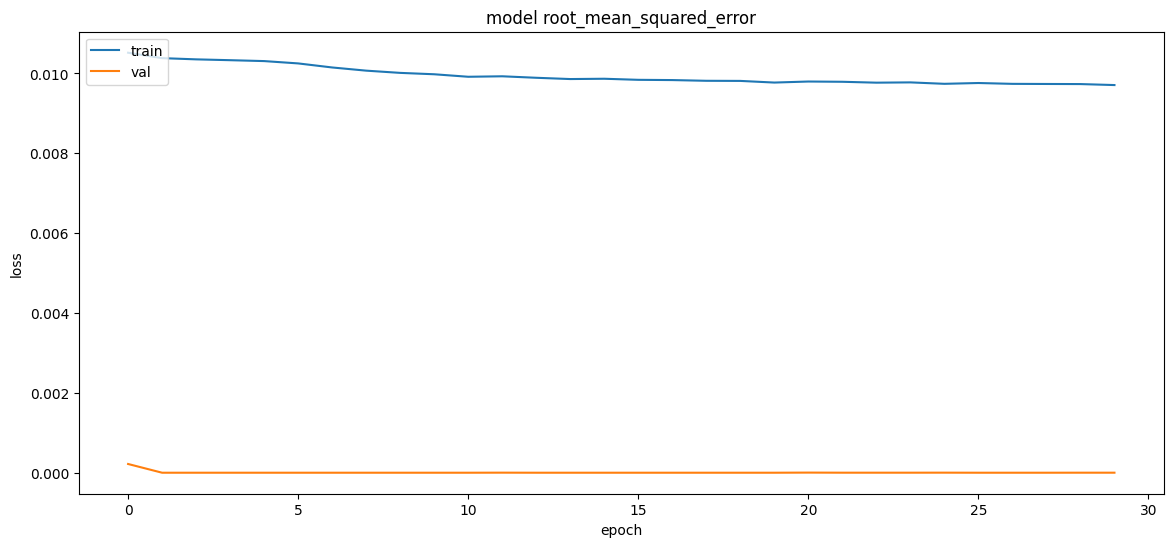

In [ ]:
# model training

gru_model = gru()
history_gru = gru_model.fit(training_set_input, training_set_output,callbacks = my_callbacks,\
                            epochs=epochs, validation_split=0.2)

#check the performance [TRAIN/ VALIDATION SETS ONLY!]
#1st plot the history performance scores
plt.figure(figsize=(14,6))
plt.plot(history_gru.history[list(history_gru.history.keys())[0]])
plt.plot(history_gru.history[list(history_gru.history.keys())[1]])
plt.title('model root_mean_squared_error')
plt.ylabel(list(history_gru.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# predictions
lstm_predictions = lstm_model.predict(testing_set_input)
rnn_predictions = rnn_model.predict(testing_set_input)
gru_predictions = gru_model.predict(testing_set_input)

313/313 [==============================] - 1s 3ms/step


In [ ]:
# Evaluate the models
# loss_lstm = lstm_model.evaluate(testing_set_input,lstm_predictions, verbose = 0)
# loss_rnn = rnn_model.evaluate(testing_set_input,rnn_predictions, verbose = 0)
# loss_gru = gru_model.evaluate(testing_set_input,gru_predictions, verbose = 0)

# print(f"LSTM: loss: {loss_lstm[0]}, accuracy: {loss_lstm[1]}, RMSE: {loss_lstm[2]}, MAE: {loss_lstm[3]}")
# print(f"RNN: loss: {loss_rnn[0]}, accuracy: {loss_rnn[1]}, RMSE: {loss_rnn[2]}, MAE: {loss_rnn[3]}")
# print(f"GRU: loss: {loss_gru[0]}, accuracy: {loss_gru[1]}, RMSE: {loss_gru[2]}, MAE: {loss_gru[3]}")

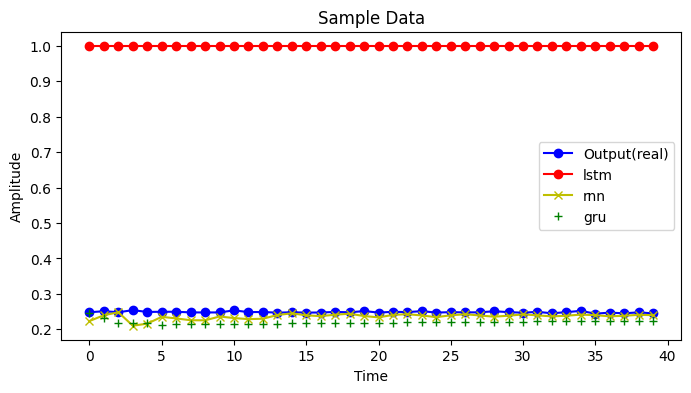

In [ ]:
# prettyprinting
plt.figure(figsize=(8, 4))
plt.plot( testing_set_output[23], 'b-o', label='Output(real)')
plt.plot( lstm_predictions[23], 'r-o', label='lstm')
plt.plot( rnn_predictions[23], 'y-x', label='rnn')
plt.plot( gru_predictions[23], 'g+', label='gru')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sample Data')
plt.legend()
plt.show()

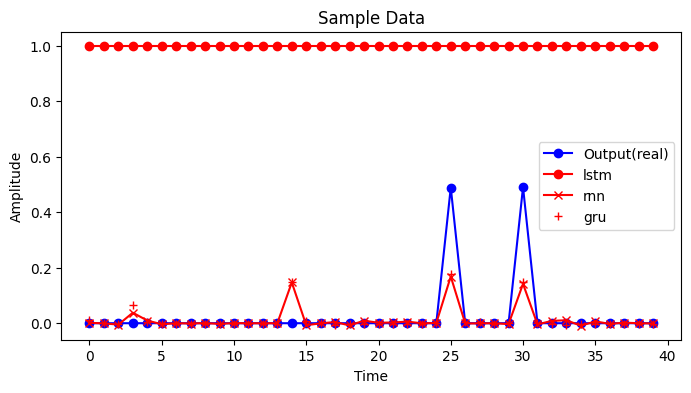

In [ ]:
# prettyprinting
plt.figure(figsize=(8, 4))
plt.plot( testing_set_output[2], 'b-o', label='Output(real)')
plt.plot( lstm_predictions[2], 'r-o', label='lstm')
plt.plot( rnn_predictions[2], 'r-x', label='rnn')
plt.plot( gru_predictions[2], 'r+', label='gru')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sample Data')
plt.legend()
plt.show()

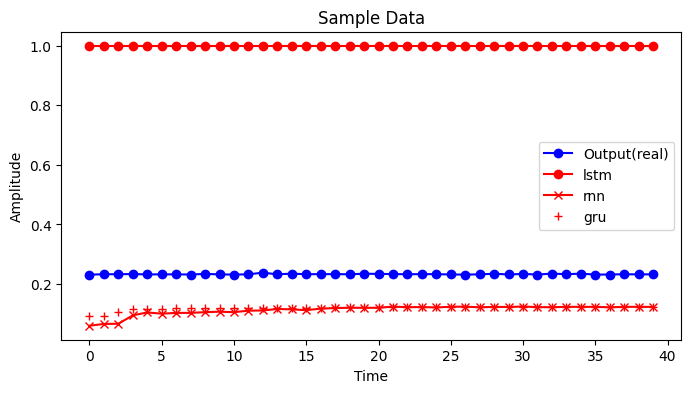

In [ ]:
# prettyprinting
plt.figure(figsize=(8, 4))
plt.plot( testing_set_output[11], 'b-o', label='Output(real)')
plt.plot( lstm_predictions[11], 'r-o', label='lstm')
plt.plot( rnn_predictions[11], 'r-x', label='rnn')
plt.plot( gru_predictions[11], 'r+', label='gru')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sample Data')
plt.legend()
plt.show()

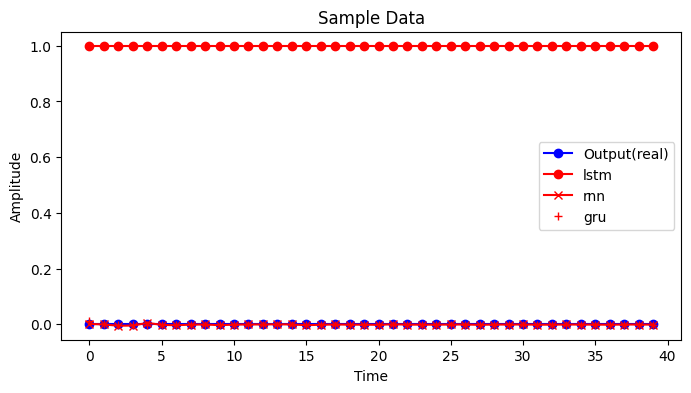

In [ ]:
# prettyprinting
plt.figure(figsize=(8, 4))
plt.plot( testing_set_output[2813], 'b-o', label='Output(real)')
plt.plot( lstm_predictions[2334], 'r-o', label='lstm')
plt.plot( rnn_predictions[2334], 'r-x', label='rnn')
plt.plot( gru_predictions[2334], 'r+', label='gru')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sample Data')
plt.legend()
plt.show()

In [ ]:
# done